## Name - Sanjeev Kumar

### Exploratory Data Analysis - Retail

### Objective:-
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?

### Load Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load Data to DataFrame

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Cleaning

In [3]:
# drop columns
df.drop(['Country','Postal Code'], axis=1, inplace=True)

In [4]:
df.duplicated().sum()

50

In [5]:
df.drop_duplicates(inplace=True)

### Basic Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   City          9944 non-null   object 
 3   State         9944 non-null   object 
 4   Region        9944 non-null   object 
 5   Category      9944 non-null   object 
 6   Sub-Category  9944 non-null   object 
 7   Sales         9944 non-null   float64
 8   Quantity      9944 non-null   int64  
 9   Discount      9944 non-null   float64
 10  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 932.2+ KB


####  This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


#### Generated descriptive statistics.

In [8]:
# does data contains any null values?
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# How many unique values each columns contains
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Data Visualization

### A correlation analysis will allow to identify relationships between the dataset variables

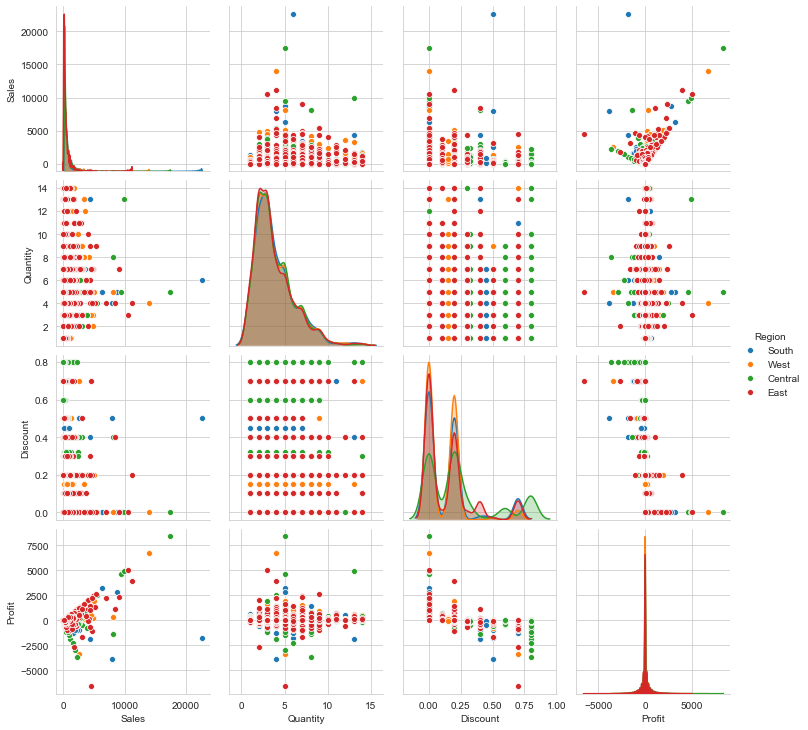

In [43]:
sns.pairplot(df,hue='Region')

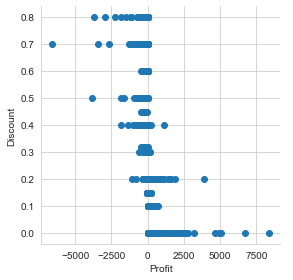

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(df, size=4) \
   .map(plt.scatter, "Profit", "Discount") \
   .add_legend();
plt.show();

### Conclusion:-
    If discount is more than 0.4 then it is loss

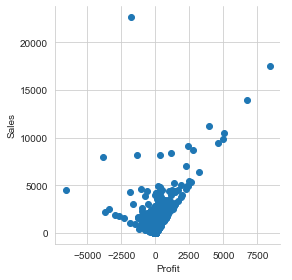

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, size=4) \
   .map(plt.scatter, "Profit", "Sales") \
   .add_legend();
plt.show();

### Conlusion:-
mostly loss if sales is below 500

### A correlation analysis will allow to identify relationships between the dataset variables

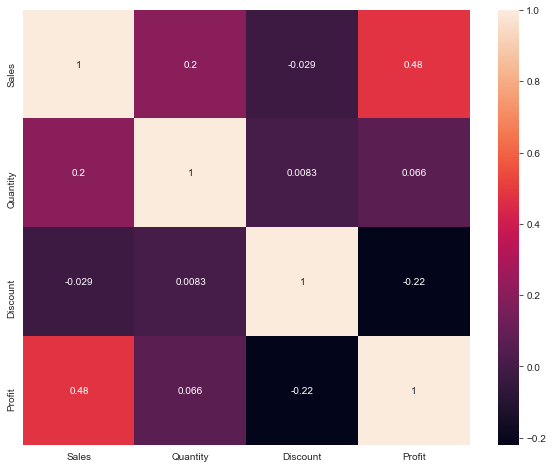

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

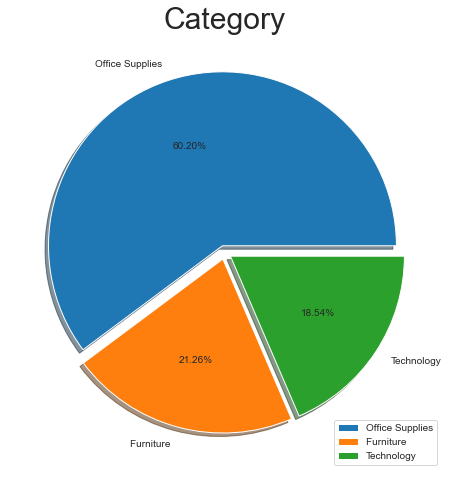

In [14]:
# plotting a pie chart
size = [5986,2114,1844]
labels = "Office Supplies", "Furniture ","Technology"
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('Category', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### Conclusion:-
    Most of the sales occur in office supplies in Category

In [15]:
df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

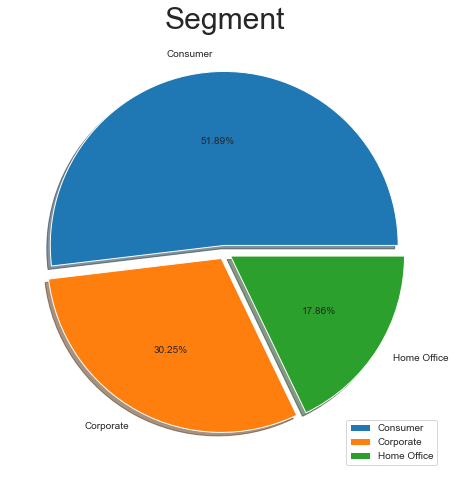

In [16]:
# plotting a pie chart
size = [5160,3008,1776]
labels = "Consumer", "Corporate","Home Office"
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('Segment', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### conclusion:-
    most of the sales occur in consumer segment

In [17]:
df['Region'].value_counts()

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

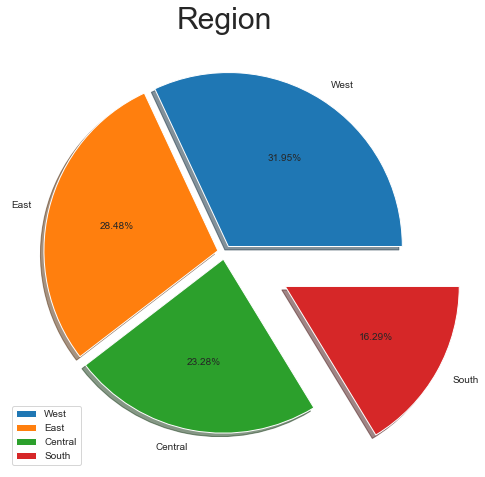

In [18]:
# plotting a pie chart
size = [3177,2832,2315,1620]
labels = "West", "East","Central","South"
explode = [0.04,0.04,0.04,0.4]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('Region', fontsize = 30)
plt.axis('off')

plt.legend()
plt.show()

### Conclusion:-
    west region has highest no of selling

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

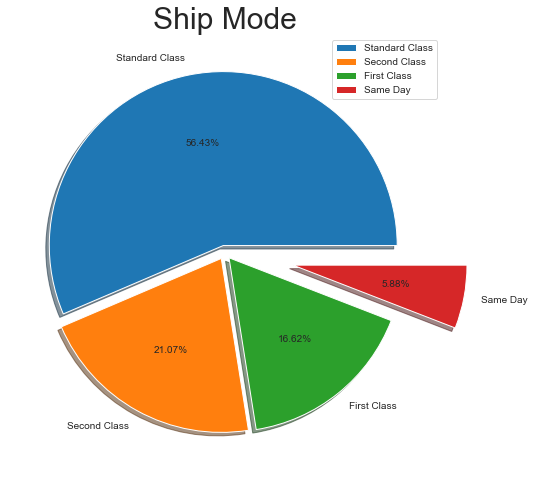

In [20]:
# plotting a pie chart
size = [5199,1941,1531,542]
labels = "Standard Class", "Second Class","First Class","Same Day"
explode = [0.04,0.04,0.04,0.4]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('Ship Mode', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### Conclusion:-
    Standard Class is highest sells in ship mode

# States

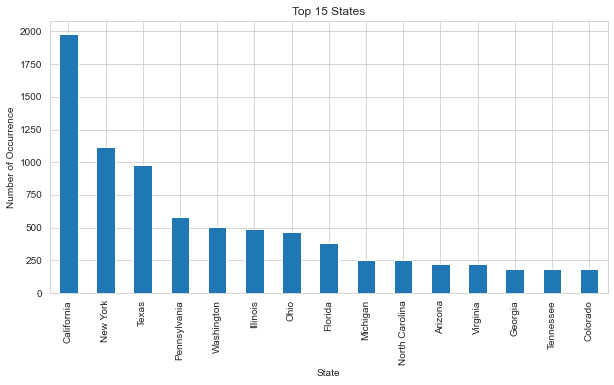

In [21]:

df['State'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 States")
plt.ylabel("Number of Occurrence")
plt.xlabel("State")
plt.show()

In [35]:
df.groupby(['State','Sales']).sum().sort_values(['Sales','Profit'],ascending=False).head(10)

,,Quantity,Discount,Profit
State,Sales,,,
Florida,22638.480,6,0.5,-1811.0784
Indiana,17499.950,5,0.0,8399.9760
Washington,13999.960,4,0.0,6719.9808
New York,11199.968,4,0.2,3919.9888
Delaware,10499.970,3,0.0,5039.9856
Michigan,9892.740,13,0.0,4946.3700
Minnesota,9449.950,5,0.0,4630.4755
New Jersey,9099.930,7,0.0,2365.9818
Virginia,8749.950,5,0.0,2799.9840


## Conclusion:-
    Although in california most sells occured but most profiting state is Indiana and Florida topped in sum of sales.

# City 

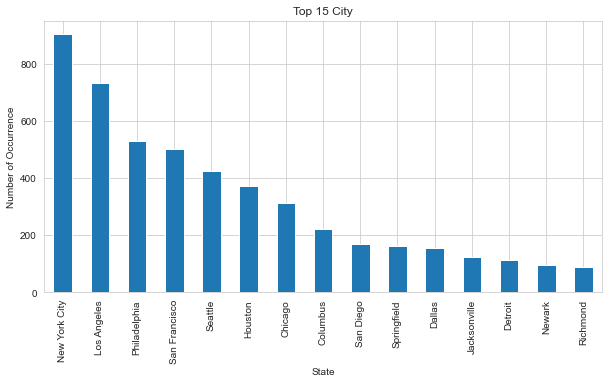

In [22]:
df['City'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 City")
plt.ylabel("Number of Occurrence")
plt.xlabel("State")
plt.show()

In [32]:
df.groupby(['City','Sales']).sum().sort_values(['Sales','Profit'],ascending=False).head(10)

,,Quantity,Discount,Profit
City,Sales,,,
Jacksonville,22638.480,6,0.5,-1811.0784
Lafayette,17499.950,5,0.0,8399.9760
Seattle,13999.960,4,0.0,6719.9808
New York City,11199.968,4,0.2,3919.9888
Newark,10499.970,3,0.0,5039.9856
Detroit,9892.740,13,0.0,4946.3700
Minneapolis,9449.950,5,0.0,4630.4755
Lakewood,9099.930,7,0.0,2365.9818
Arlington,8749.950,5,0.0,2799.9840


### Conclusion:-
    most sells occurs in New York City but Lafayette is most profiting city

# Category

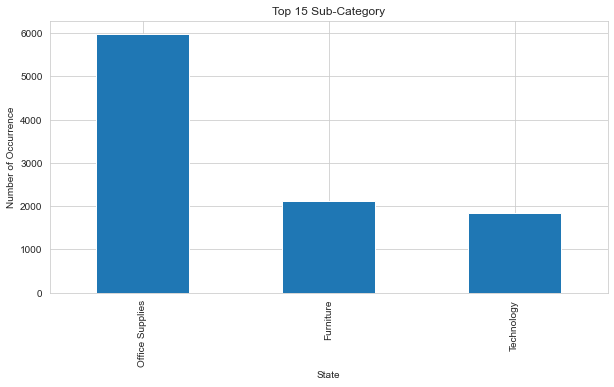

In [33]:
df['Category'].value_counts().nlargest().plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Sub-Category")
plt.ylabel("Number of Occurrence")
plt.xlabel("State")
plt.show()

In [30]:
df.groupby('Category')['Sales','Profit'].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Category,,
Technology,835774.6410,145416.5394
Furniture,740568.6663,18484.9459
Office Supplies,718256.0700,122196.0726


### Conclusion:-
    office Supplies get sold most of the times but technology is most profiting category

In [27]:
df.groupby(['Category','Sub-Category']).sum().sort_values(['Category','Sales'],ascending=False)

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Technology      Phones        329704.6780      3286    137.20  44493.0524
                Machines      189238.6310       440     35.20   3384.7569
                Accessories   167303.3020      2972     60.60  41920.9052
                Copiers       149528.0300       234     11.00  55617.8249
Office Supplies Storage       223808.4400      3156     63.00  21287.1788
                Binders       203328.8590      5961    564.80  30205.2603
                Appliances    107532.1610      1729     77.60  18138.0054
                Paper          77960.8940      5100    100.80  33830.0381
                Supplies       46673.5380       647     14.60  -1189.0995
                Art            27065.7320      2986     59.60   6511.8388
                Envelopes      16476.4020       906     20.40   6964.1767
                Labels         12385.7640      1387     24.80   5499.1558
                Fasteners       3024.2800       914     17.80    949.5182
Furniture       Chairs        327777.7610      2351    104.70  26567.1278
                Tables        206965.5320      1241     83.35 -17725.4811
                Bookcases     114166.9293       863     47.79  -3398.7542
                Furnishings    91658.4440      3555    132.40  13042.0534

# Region

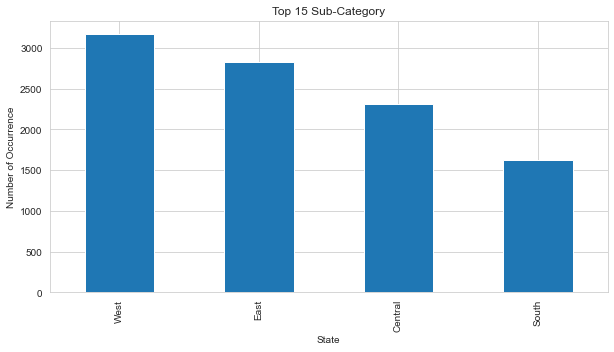

In [36]:
df['Region'].value_counts().nlargest().plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Sub-Category")
plt.ylabel("Number of Occurrence")
plt.xlabel("State")
plt.show()

In [29]:
df.groupby('Region')['Sales','Profit'].sum().sort_values('Sales',ascending=False)

,Sales,Profit
Region,,
West,724309.2935,108214.9893
East,677843.9080,91471.0909
Central,500724.2708,39662.0474
South,391721.9050,46749.4303


In [28]:
df.groupby(['Region','Category']).sum().sort_values(['Region','Sales'],ascending=True)

Sales  Quantity  Discount      Profit
Region  Category                                                    
Central Furniture        163407.1938      1824    143.04  -2906.1467
        Office Supplies  166900.7650      5390    356.80   8870.7621
        Technology       170416.3120      1544     55.90  33697.4320
East    Office Supplies  205279.0190      6430    243.50  40917.8145
        Furniture        207631.6840      2205     92.10   3091.7510
        Technology       264933.2050      1939     76.50  47461.5254
South   Furniture        117298.6840      1291     40.35   6771.2061
        Office Supplies  125651.3130      3800    166.60  19986.3928
        Technology       148771.9080      1118     31.60  19991.8314
West    Office Supplies  220424.9730      7166    176.50  52421.1032
        Technology       251653.2160      2331     80.00  44265.7506
        Furniture        252231.1045      2690     92.75  11528.1355

### Conclusions:-
most selling occurs in west and most profiting is also west.

# Conclusion:-
* South is weak Region
* Furniture is weak Category
* very few people opt for same day delivery
* home office is weak in segment
* as a manager need to make new startegy to sell more in weak areas to get more profits.
* most of the city, states, category sales more but not pofiting as expected.